# Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio


### Passo a Passo

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd

base = pd.read_csv('recursos/advertising.csv')
display(base)
# ajustes na base de dados (ja ta ajustado)

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
# correlação
base.corr()

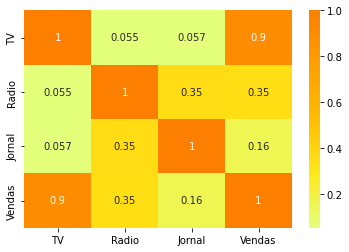

In [26]:
# analise exploratória -> entender como a sua base de dados está se comportando

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(base.corr(), annot = True, cmap="Wistia") # libry criada apartir do matplotlib, usamo ele por ter o mapa de calor
#annot = anotações, valores cmap = escala de cores
#sns.pairplot(base)
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [28]:
display(base)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [40]:
# criar a inteligência artificial e fazer as previsões

from sklearn.model_selection import train_test_split

previsores = base.iloc[:,0:3]
classe = base.iloc[:,3] 

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

regressor_Linear = LinearRegression()
regressor_Forest = RandomForestRegressor()

regressor_Linear.fit(previsores_treinamento, classe_treinamento)
regressor_Forest.fit(previsores_treinamento, classe_treinamento)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [64]:
previsao_Linear = regressor_Linear.predict(previsores_teste)
previsao_Forest = regressor_Forest.predict(previsores_teste)

from sklearn.metrics import r2_score

resultado_Linear = metrics.r2_score(classe_teste, previsao_Linear)
resultado_Forest = metrics.r2_score(classe_teste, previsao_Forest)

print(resultado_Forest, resultado_Linear)

0.969276356249324 0.9048917241361681


#### Visualização Gráfica das Previsões

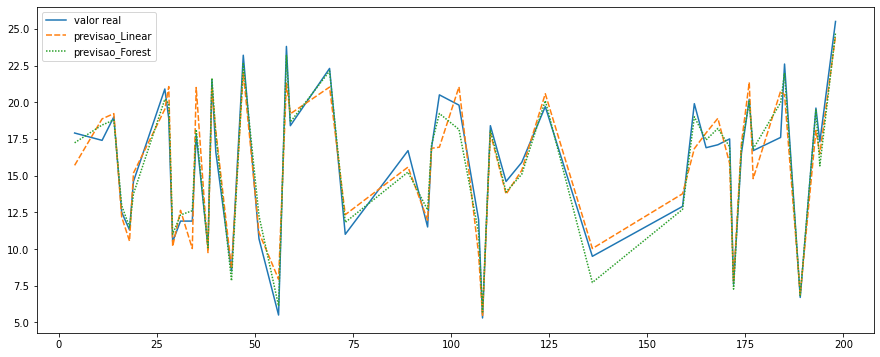

In [68]:
base_resultados = pd.DataFrame()
base_resultados['valor real'] = classe_teste
base_resultados['previsao_Linear'] = previsao_Linear
base_resultados['previsao_Forest'] = previsao_Forest

plt.figure(figsize=(15, 6)) # tamanho do plot
sns.lineplot(data=base_resultados)
plt.show()


#### Como fazer uma nova previsão?

In [72]:
base_novo = pd.read_csv('recursos/novos.csv')
display(base_novo)

previsao_Forest_novo = regressor_Forest.predict(base_novo)
print(previsao_Forest_novo)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 8.094  8.647 20.2  ]


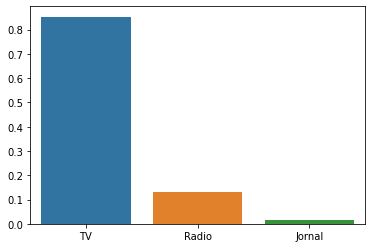

In [76]:
sns.barplot(x=previsores_treinamento.columns, y=regressor_Forest.feature_importances_)
plt.show()